In [1]:
# Import required dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

# Configure matplotlib
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1(np.linspace(0, 1, 10)))

In [2]:
# import trace data
conv_trace_df = pd.read_csv("./traces/AzureLLMInferenceTrace_conv_1week.csv")
code_trace_df = pd.read_csv("./traces/AzureLLMInferenceTrace_code_1week.csv")

In [3]:
# print stats of the conv trace
conv_trace_df.describe()

,ContextTokens,GeneratedTokens
count,2.730400e+07,2.730400e+07
mean,1.631580e+03,1.055092e+02
std,1.529639e+03,1.582525e+02
min,1.000000e+00,1.000000e+00
25%,5.460000e+02,1.400000e+01
50%,9.280000e+02,4.100000e+01
75%,2.357000e+03,1.080000e+02
max,7.999000e+03,1.500000e+03


In [4]:
# print stats of the code trace
code_trace_df.describe()

,ContextTokens,GeneratedTokens
count,1.680370e+07,1.680370e+07
mean,2.511276e+03,2.268973e+01
std,2.133541e+03,7.478323e+01
min,1.000000e+00,1.000000e+00
25%,9.380000e+02,3.000000e+00
50%,1.930000e+03,8.000000e+00
75%,3.348000e+03,1.800000e+01
max,7.743000e+03,5.000000e+03


Conv Trace - Max Context Tokens: 7999, Avg Context Tokens: 1631.579539612494
Code Trace - Max Context Tokens: 7743, Avg Context Tokens: 2511.27569103105


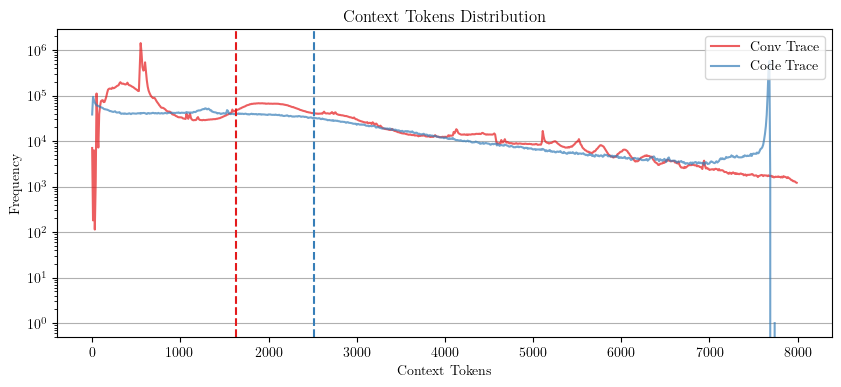

In [5]:
# extract the context tokens from the conv trace
conv_max_context_tokens = conv_trace_df['ContextTokens'].max()
conv_bins = np.arange(0, conv_max_context_tokens + 10, 10)
conv_hist, conv_bin_edges = np.histogram(conv_trace_df['ContextTokens'], bins=conv_bins)
conv_avg_context_tokens = conv_trace_df['ContextTokens'].mean()
print(f"Conv Trace - Max Context Tokens: {conv_max_context_tokens}, Avg Context Tokens: {conv_avg_context_tokens}")

# extract the context tokens from the code trace
code_max_context_tokens = code_trace_df['ContextTokens'].max()
code_bins = np.arange(0, code_max_context_tokens + 10, 10)
code_hist, code_bin_edges = np.histogram(code_trace_df['ContextTokens'], bins=code_bins)
code_avg_context_tokens = code_trace_df['ContextTokens'].mean()
print(f"Code Trace - Max Context Tokens: {code_max_context_tokens}, Avg Context Tokens: {code_avg_context_tokens}")

# Plot histogram
plt.figure(figsize=(10, 4))
plt.plot(conv_bin_edges[:-1], conv_hist, alpha=0.7, label='Conv Trace')
plt.plot(code_bin_edges[:-1], code_hist, alpha=0.7, label='Code Trace')
plt.axvline(x=conv_avg_context_tokens, linestyle='--', color='C0')
plt.axvline(x=code_avg_context_tokens, linestyle='--', color='C1')
plt.title("Context Tokens Distribution")
plt.xlabel("Context Tokens")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

Conv Trace - Max Generated Tokens: 1500, Avg Generated Tokens: 105.5091875003365
Code Trace - Max Generated Tokens: 5000, Avg Generated Tokens: 22.689729967129253


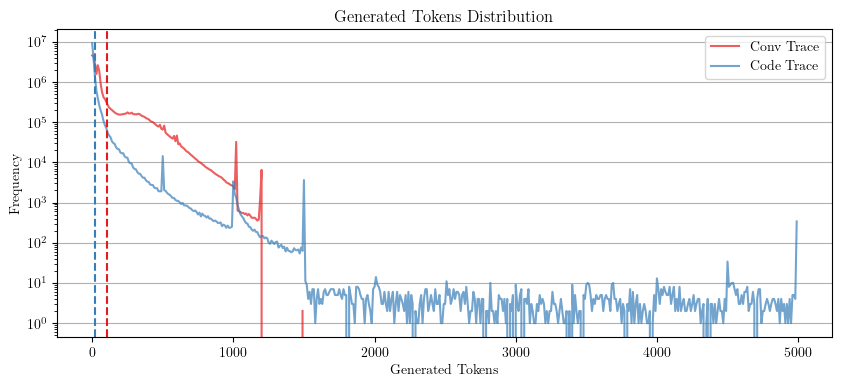

In [6]:
# extract the generated tokens from the conv trace
conv_max_generated_tokens = conv_trace_df['GeneratedTokens'].max()
conv_bins = np.arange(0, conv_max_generated_tokens + 10, 10)
conv_hist, conv_bin_edges = np.histogram(conv_trace_df['GeneratedTokens'], bins=conv_bins)
conv_avg_generated_tokens = conv_trace_df['GeneratedTokens'].mean()
print(f"Conv Trace - Max Generated Tokens: {conv_max_generated_tokens}, Avg Generated Tokens: {conv_avg_generated_tokens}")

# extract the generated tokens from the code trace
code_max_generated_tokens = code_trace_df['GeneratedTokens'].max()
code_bins = np.arange(0, code_max_generated_tokens + 10, 10)
code_hist, code_bin_edges = np.histogram(code_trace_df['GeneratedTokens'], bins=code_bins)
code_avg_generated_tokens = code_trace_df['GeneratedTokens'].mean()
print(f"Code Trace - Max Generated Tokens: {code_max_generated_tokens}, Avg Generated Tokens: {code_avg_generated_tokens}")

# Plot histogram
plt.figure(figsize=(10, 4))
plt.plot(conv_bin_edges[:-1], conv_hist, alpha=0.7, label='Conv Trace')
plt.plot(code_bin_edges[:-1], code_hist, alpha=0.7, label='Code Trace')
plt.axvline(x=conv_avg_generated_tokens, linestyle='--', color='C0')
plt.axvline(x=code_avg_generated_tokens, linestyle='--', color='C1')
plt.title("Generated Tokens Distribution")
plt.xlabel("Generated Tokens")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.yscale('log')
plt.legend()
plt.show()